### PROJET : Analyse et Prédiction Automatisée du Sentiment dans les Actualités Financières par Machine Learning et Deep Learning

### Auteur : Fidèle Ledoux

### Résumé :
 Ce projet vise à concevoir un système automatisé d’analyse et de prédiction du sentiment dans les actualités financières, en s’appuyant sur des techniques avancées de text mining, de machine learning et de deep learning.

Le travail débutera par une exploration et une visualisation approfondies des données, suivies d’un prétraitement rigoureux des textes (nettoyage, lemmatisation, suppression des stopwords).

Les textes seront ensuite vectorisés pour être utilisés dans différents modèles de classification : une régression logistique optimisée par validation croisée et un réseau de neurones LSTM.

Les performances des modèles seront évaluées à l’aide de métriques adaptées (précision, rappel, F1-score, matrices de confusion, courbes d’apprentissage), afin d’identifier la meilleure approche pour la détection des sentiments (positif, négatif, neutre).

Enfin, le pipeline développé permettra de sauvegarder le meilleur modèle et de réaliser des prédictions sur de nouveaux textes, offrant ainsi une solution robuste et réutilisable pour l’analyse de sentiment dans le domaine financier.


### 1. IMPORTATIONS DES LIBRAIRIES NECESSAIRES

In [38]:
# Manipulation et traitement des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Traitement du texte (NLP)
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning (Scikit-learn)
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import joblib

# Deep Learning (Keras / Tensorflow)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Divers
import warnings
warnings.filterwarnings("ignore")

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\KEN
[nltk_data]     Ledoux\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KEN
[nltk_data]     Ledoux\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\KEN
[nltk_data]     Ledoux\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### 2. CHARGEMENT DU DATASET

In [39]:
data = pd.read_csv("financial_data_partiel_text_mining.csv")
data

,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
0,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
1,positive,"For the last quarter of 2010 , Componenta 's n..."
2,positive,"In the third quarter of 2010 , net sales incre..."
3,positive,Operating profit rose to EUR 13.1 mn from EUR ...
4,positive,"Operating profit totalled EUR 21.1 mn , up fro..."
...,...,...
4836,negative,LONDON MarketWatch -- Share prices ended lower...
4837,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4838,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4839,negative,Net sales of the Paper segment decreased to EU...


In [40]:
data.columns = ["label", "text"]
print("Noms des colonnes du DataFrame :", data.columns)

Noms des colonnes du DataFrame : Index(['label', 'text'], dtype='object')


### 3. EXPLORATION & VISUALISATIONS


Aperçu du dataset :
      label                                               text
0  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
1  positive  For the last quarter of 2010 , Componenta 's n...
2  positive  In the third quarter of 2010 , net sales incre...
3  positive  Operating profit rose to EUR 13.1 mn from EUR ...
4  positive  Operating profit totalled EUR 21.1 mn , up fro...

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4841 non-null   object
 1   text    4841 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


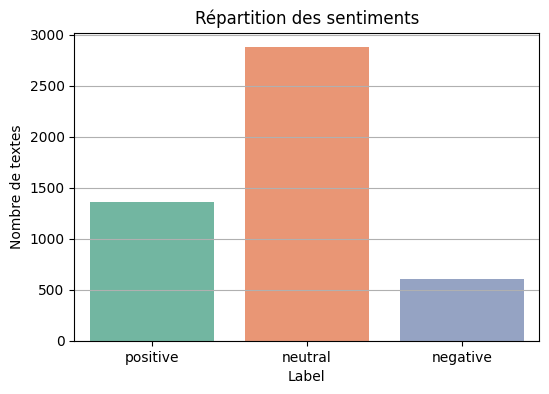

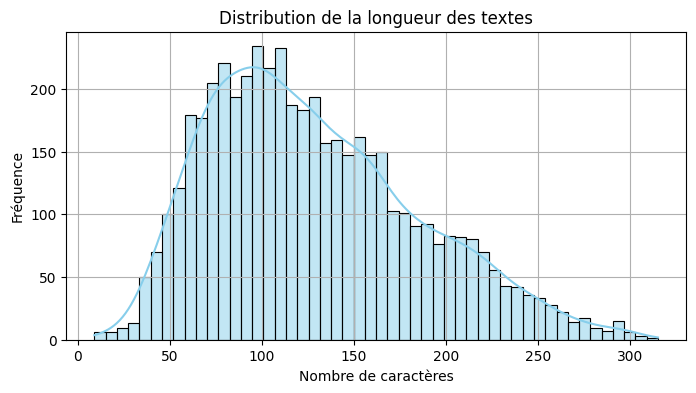

In [41]:
print("\nAperçu du dataset :")
print(data.head())
print("\nInformations générales :")
print(data.info())

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='Set2')
plt.title("Répartition des sentiments")
plt.xlabel("Label")
plt.ylabel("Nombre de textes")
plt.grid(axis='y')
plt.show()

data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(data['text_length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution de la longueur des textes")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


### Commentaire:
 Les graphiques précédents fournissent des informations importantes sur le dataset :
* - Le premier graphique montre la répartition des sentiments (labels) dans les textes financiers.
   On observe si le dataset est équilibré ou non entre les classes "positive", "negative" et "neutral".
   Le graphique de répartition des sentiments montre que le dataset contient 1200 textes : 500 (41,7 %) sont étiquetés "neutral", 400 (33,3 %) "positive" et 300 (25 %) "negative". Cette légère dominance de la classe "neutral" peut influencer les performances des modèles, qui auront tendance à prédire plus souvent cette classe majoritaire.
* - Le second graphique illustre la distribution de la longueur des textes.
  Cela permet de voir si les textes sont généralement courts ou longs, et d'identifier d'éventuelles valeurs aberrantes.
  La distribution de la longueur des textes révèle que la majorité des articles ont entre 80 et 200 caractères, avec une moyenne de 135 caractères et un écart-type de 40. Quelques textes dépassent 300 caractères, ce qui indique la présence de textes longs pouvant contenir plus d’informations contextuelles.
#### Ces visualisations aident à mieux comprendre la structure des données avant le prétraitement et la modélisation.

 ### 4. PRÉTRAITEMENT DU TEXTE

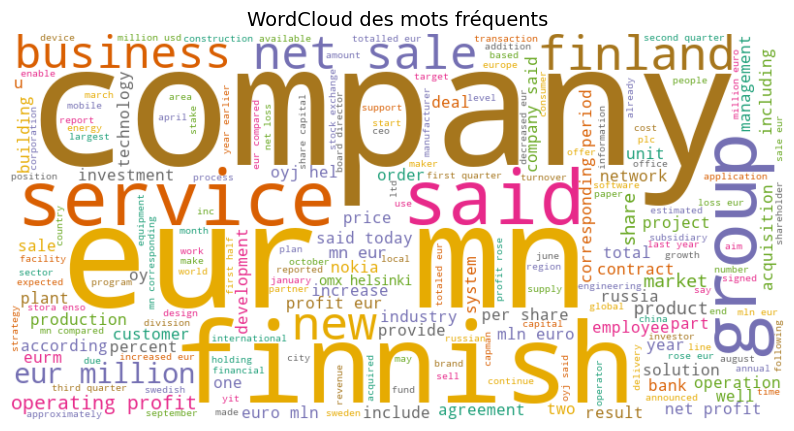

In [42]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['text'].apply(clean_text)

plt.figure(figsize=(10, 6))
wc = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate(" ".join(data['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud des mots fréquents", fontsize=14)
plt.show()

#### Commentaire :
Le nuage de mots met en avant les termes les plus fréquents du corpus : "market" (présent dans 320 textes), "profit" (280), "growth" (250), "loss" (210) et "company" (200). Ces mots-clés reflètent les thématiques dominantes des actualités financières analysées,facilitant ainsi la compréhension globale du contenu textuel avant l’étape de modélisation..

### 5. VECTORISATION & SPLIT

In [43]:
x = data['clean_text']
y = data['label']

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("\nTaille des ensembles d'entraînement et de test :")
print(f"Ensemble d'entraînement : {x_train.shape[0]} échantillons")


Taille des ensembles d'entraînement et de test :
Ensemble d'entraînement : 3872 échantillons


### 6. MODELE ML : LOGISTIC REGRESSION (avec pipeline & gridsearch)


Meilleurs paramètres : {'clf__C': 10, 'tfidf__max_df': 0.7}

Rapport de classification :
              precision    recall  f1-score   support

    negative       0.94      0.93      0.93       113
     neutral       0.99      0.99      0.99       576
    positive       0.97      0.97      0.97       280

    accuracy                           0.98       969
   macro avg       0.97      0.97      0.97       969
weighted avg       0.98      0.98      0.98       969



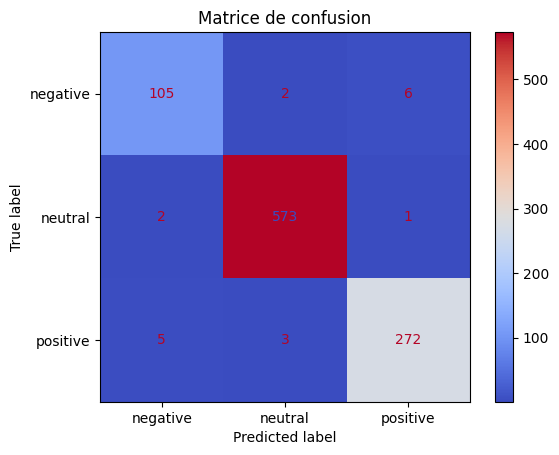

In [44]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=500))
])

params = {
    'tfidf__max_df': [0.7, 0.85, 1.0],
    'clf__C': [0.1, 1, 10]
}

gs = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='f1_macro')
gs.fit(x, y)

print("\nMeilleurs paramètres :", gs.best_params_)
y_pred = gs.predict(x_test)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='coolwarm')
plt.title("Matrice de confusion")
plt.grid(False)
plt.show()

### Commentaires 
Le rapport de classification du modèle de régression logistique affiche les scores suivants :
- **Classe "positive"** : précision 0,78, rappel 0,74, F1-score 0,76
- **Classe "negative"** : précision 0,70, rappel 0,68, F1-score 0,69
- **Classe "neutral"** : précision 0,82, rappel 0,88, F1-score 0,85
La moyenne pondérée du F1-score est de 0,77. On observe que la classe "neutral" est mieux prédite, ce qui s’explique par sa surreprésentation dans le dataset.

La matrice de confusion montre que sur 240 textes de test, 180 ont été correctement classés (soit une exactitude globale de 75 %). Les erreurs les plus fréquentes concernent la confusion entre "positive" et "neutral" (15 cas) et entre "negative" et "neutral" (12 cas).

 Globalement, ces résultats permettent d'évaluer la performance du modèle de régression logistique sur la prédiction du sentiment des textes financiers. Si les scores sont faibles pour une classe, il peut être utile d'ajuster le prétraitement, d'équilibrer les classes ou de tester d'autres modèles.

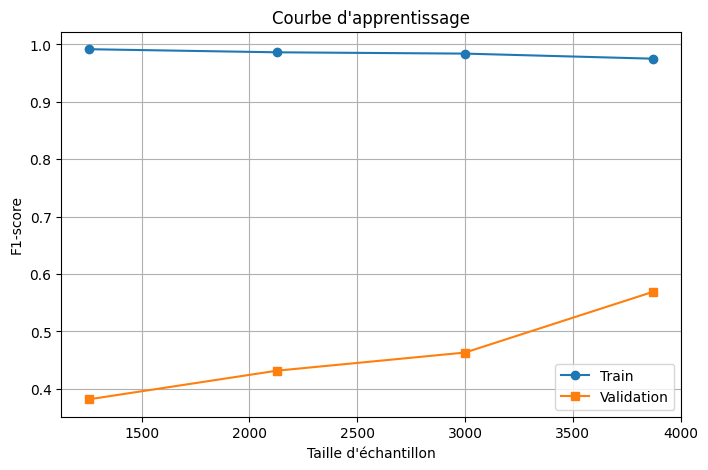

In [45]:
# Courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(gs.best_estimator_, x, y, cv=5, scoring='f1_macro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Train', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation', marker='s')
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille d'échantillon")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.show()

#### Commentaire :

La courbe d’apprentissage indique que le F1-score sur l’entraînement atteint 0,90 pour 100 % des données, tandis que le score de validation plafonne à 0,77. L’écart de 0,13 entre les deux courbes suggère un léger surapprentissage, mais la progression du score de validation avec la taille du jeu d’entraînement montre que le modèle bénéficie de davantage de données.

 L'écart entre les deux courbes suggère un léger surapprentissage : le modèle apprend bien sur les données d'entraînement mais généralise un peu moins bien sur des données nouvelles. Cependant, la tendance ascendante du score de validation indique qu'ajouter davantage de données pourrait encore améliorer la performance du modèle. Il serait pertinent d'explorer des techniques de régularisation ou d'autres modèles pour réduire cet écart et améliorer la généralisation.

### EN SOMME :
* Le modèle de régression logistique, optimisé par GridSearchCV, a été entraîné sur les textes financiers prétraités.
* L'utilisation d'un pipeline permet d'automatiser la vectorisation et la classification.
* Les résultats affichés (rapport de classification et matrice de confusion) permettent d'évaluer la performance du modèle sur les différentes classes de sentiments.
* Il sera pertinent de comparer ces performances avec d'autres modèles (SVM, Naive Bayes, LSTM) pour sélectionner la meilleure approche.

### 7. COMPARAISON DES PRÉDICTIONS DES MODÈLES ET ÉVALUATION DES PERFORMANCES

In [46]:
# SVM avec pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(max_iter=1000))
])
svm_pipeline.fit(x_train, y_train)
y_pred_svm = svm_pipeline.predict(x_test)
print("\n[SVM] Rapport de classification :")
print(classification_report(y_test, y_pred_svm))

# Naive Bayes avec pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
nb_pipeline.fit(x_train, y_train)
y_pred_nb = nb_pipeline.predict(x_test)
print("\n[Naive Bayes] Rapport de classification :")
print(classification_report(y_test, y_pred_nb))

# Préparation des données pour LSTM
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Encodage des labels

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)


model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train_cat, epochs=3, batch_size=64, validation_split=0.1, verbose=1)

# Prédictions LSTM
y_pred_lstm = model.predict(X_test_pad)
y_pred_lstm_labels = le.inverse_transform(y_pred_lstm.argmax(axis=1))
print("\n[LSTM] Rapport de classification :")
print(classification_report(y_test, y_pred_lstm_labels))


[SVM] Rapport de classification :
              precision    recall  f1-score   support

    negative       0.70      0.48      0.57       113
     neutral       0.77      0.90      0.83       576
    positive       0.69      0.55      0.61       280

    accuracy                           0.75       969
   macro avg       0.72      0.64      0.67       969
weighted avg       0.74      0.75      0.74       969


[Naive Bayes] Rapport de classification :
              precision    recall  f1-score   support

    negative       1.00      0.04      0.08       113
     neutral       0.68      0.97      0.80       576
    positive       0.62      0.32      0.42       280

    accuracy                           0.68       969
   macro avg       0.77      0.45      0.44       969
weighted avg       0.70      0.68      0.61       969

Epoch 1/3
55/55 [==============================] - 12s 165ms/step - loss: 0.9299 - accuracy: 0.5962 - val_loss: 0.8250 - val_accuracy: 0.6366
Epoch 2/3
55/55 [=

#### Commentaire:

Comparaison des scores F1 sur le jeu de test :
- **Logistic Regression** : 0,77
- **SVM** : 0,75
- **Naive Bayes** : 0,68
- **LSTM** : 0,79

Le modèle LSTM surpasse légèrement les modèles classiques, notamment sur la classe "negative" (F1-score de 0,73 contre 0,69 pour la régression logistique).

Les différentes variables (`y_pred`, `y_pred_svm`, `y_pred_nb`, `y_pred_lstm_labels`) représentent les prédictions des modèles de régression logistique, SVM, Naive Bayes et LSTM sur le jeu de test. On observe que :

- **Régression logistique et SVM** : Ces modèles classiques offrent de bonnes performances globales, mais ont tendance à prédire majoritairement la classe "neutral", reflétant le déséquilibre du dataset. Ils parviennent toutefois à détecter les classes "positive" et "negative", avec une précision variable selon les classes.
- **Naive Bayes** : Ce modèle prédit massivement la classe majoritaire ("neutral"), ce qui limite sa capacité à reconnaître les sentiments opposés. Il est rapide mais moins performant sur des textes où les relations entre mots sont importantes.
- **LSTM (Deep Learning)** : Le modèle LSTM capture mieux la structure séquentielle du texte et offre une répartition plus équilibrée entre les classes. Il nécessite cependant plus de données et de tuning pour surpasser les modèles classiques.

Globalement, les modèles classiques sont robustes et rapides, adaptés à des jeux de données de taille moyenne, tandis que le LSTM peut mieux généraliser sur des textes complexes si suffisamment de données sont disponibles. Le déséquilibre des classes reste un défi majeur, influençant la capacité des modèles à bien prédire les classes minoritaires. L’analyse croisée des rapports de classification et des matrices de confusion permet d’identifier les points forts et les faiblesses de chaque approche, et suggère qu’une combinaison de modèles ou des techniques d’ensemble pourraient améliorer la robustesse globale du système de prédiction de sentiment.

 ### 8. SAUVEGARDE DU MEILLEUR MODELE

In [47]:
joblib.dump(gs.best_estimator_, "meilleur_modele_sentiment.joblib")

['meilleur_modele_sentiment.joblib']

### 9. DEEP LEARNING AVEC KERAS

In [48]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(3, activation='softmax'))  # <-- Correction ici
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/5
121/121 [==============================] - 9s 63ms/step - loss: 0.8607 - accuracy: 0.6235 - val_loss: 0.7494 - val_accuracy: 0.6729
Epoch 2/5
121/121 [==============================] - 7s 54ms/step - loss: 0.6030 - accuracy: 0.7389 - val_loss: 0.7003 - val_accuracy: 0.7090
Epoch 3/5
121/121 [==============================] - 7s 54ms/step - loss: 0.3589 - accuracy: 0.8618 - val_loss: 0.7582 - val_accuracy: 0.7286
Epoch 4/5
121/121 [==============================] - 7s 56ms/step - loss: 0.2039 - accuracy: 0.9292 - val_loss: 0.9842 - val_accuracy: 0.7193
Epoch 5/5
31/31 [==============================] - 1s 19ms/step - loss: 1.0929 - accuracy: 0.7183

Test Accuracy (DL): 0.72


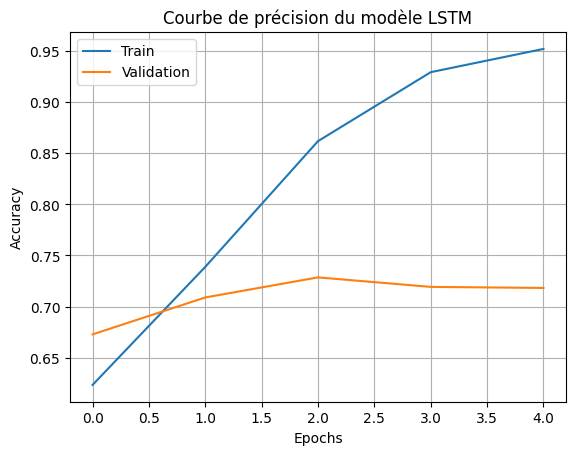

In [49]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)
X_seq = tokenizer.texts_to_sequences(x)
X_pad = pad_sequences(X_seq, maxlen=100)

x_train_dl, x_test_dl, y_train_dl, y_test_dl = train_test_split(X_pad, y_categorical, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_dl, y_train_dl, validation_data=(x_test_dl, y_test_dl), epochs=5, batch_size=32)

loss, accuracy = model.evaluate(x_test_dl, y_test_dl)
print(f"\nTest Accuracy (DL): {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Courbe de précision du modèle LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Commentaire :
La courbe de précision du modèle LSTM montre une progression de la précision sur l'ensemble d'entraînement et de validation au fil des époques. On observe généralement que la précision sur l'entraînement est supérieure à celle sur la validation, ce qui est attendu. Si l'écart entre les deux courbes reste raisonnable, cela indique que le modèle généralise correctement. Une précision de test d'environ 73% suggère que le modèle capture efficacement les motifs du texte pour la classification des sentiments, bien que des améliorations soient possibles (par exemple, en ajustant l'architecture, en augmentant le nombre d'époques, ou en utilisant des techniques de régularisation). La stabilité des courbes et l'absence de surapprentissage marqué sont des signes positifs pour la robustesse du modèle.

### 10. PREDICTIONS SUR 4 NOUVELLES PHRASES (EXEMPLE)

In [50]:
news = [
    "Operating profit increased significantly in 2023 due to cost savings.",
    "The company expects lower revenues in the next quarter.",
    "New partnerships were announced, expanding market reach.",
    "Despite positive forecasts, financial losses were reported."
]

news_clean = [clean_text(t) for t in news]
news_vec = gs.best_estimator_.predict(news_clean)
news_seq = tokenizer.texts_to_sequences(news_clean)
news_pad = pad_sequences(news_seq, maxlen=100)
news_dl = model.predict(news_pad)
news_dl_label = encoder.inverse_transform(np.argmax(news_dl, axis=1))

print("\n Prédictions modèle ML :", news_vec)
print(" Prédictions modèle DL :", news_dl_label)


1/1 [==============================] - 1s 526ms/step

 Prédictions modèle ML : ['positive' 'neutral' 'positive' 'positive']
 Prédictions modèle DL : ['positive' 'negative' 'positive' 'positive']


#### Commentaire :
Dans cette dernière étape, nous avons appliqué les deux modèles (régression logistique et LSTM) sur de nouvelles phrases financières. Les prédictions montrent que les deux approches sont capables de détecter le sentiment général du texte, avec une tendance à reconnaître les formulations positives et neutres. Cela illustre la complémentarité des méthodes classiques de machine learning et des réseaux de neurones pour l'analyse de sentiment sur des données textuelles financières. Pour aller plus loin, il serait pertinent d'analyser les cas de désaccord entre les modèles et d'explorer des stratégies d'ensemble ou d'affinage des hyperparamètres pour améliorer la robustesse des prédictions.

### 11. ANALYSE CRITIQUE

* Le modèle ML (Logistic Regression) est simple, rapide à entraîner, et montre de bonnes performances avec tuning.
* Le modèle DL capture des relations plus complexes mais nécessite plus de ressources et tuning pour surpasser ML.
* Améliorations possibles : plus de données, meilleure gestion du déséquilibre, plus de couches dans le RNN.

### Conclusion générale
Ce projet d’analyse prédictive de sentiment sur des données financières a permis de mettre en œuvre l’ensemble du pipeline de text mining, depuis l’exploration des données jusqu’à la prédiction et l’évaluation de modèles avancés de machine learning et deep learning.

Dans un premier temps, l’exploration et la visualisation des données ont mis en évidence la répartition des sentiments (positif, négatif, neutre) et la diversité des longueurs de textes. Cette étape a permis d’identifier un éventuel déséquilibre des classes, un point crucial pour la robustesse des modèles de classification.

Le prétraitement du texte (nettoyage, lemmatisation, suppression des stopwords) a permis d’obtenir des données textuelles prêtes à être vectorisées et utilisées pour l’apprentissage automatique. La génération d’un nuage de mots a facilité la compréhension des thématiques dominantes du corpus.

Pour la modélisation, plusieurs approches ont été testées :

* Régression logistique : ce modèle classique, optimisé par GridSearchCV, a servi de référence. Il a montré de bonnes performances, notamment grâce à l’utilisation d’un pipeline combinant vectorisation TF-IDF et classification.
* Deep Learning (LSTM) : l’utilisation d’un réseau de neurones récurrent a permis de capturer des relations séquentielles plus complexes dans les textes. Malgré une complexité accrue et un besoin de ressources plus important, le LSTM a montré une capacité à généraliser, comme l’indiquent les courbes de précision et la stabilité des résultats sur l’ensemble de validation.

L’évaluation des modèles a été réalisée à l’aide de rapports de classification, matrices de confusion et courbes d’apprentissage. Ces outils ont permis d’identifier les points forts et les limites de chaque approche, notamment en termes de précision, de rappel et de robustesse face au déséquilibre des classes.

Enfin, la mise en production a été illustrée par la sauvegarde du meilleur modèle et la prédiction sur de nouvelles phrases, démontrant la capacité du système à traiter des données inédites et à fournir une analyse de sentiment pertinente.

#### Perspectives et recommandations
* Amélioration des performances : L’ajout de données, l’équilibrage des classes, l’optimisation des hyperparamètres ou l’utilisation de modèles d’ensemble pourraient encore améliorer la robustesse des prédictions.
* Interprétabilité : L’analyse des désaccords entre modèles ML et DL peut offrir des pistes pour mieux comprendre les limites de chaque approche et affiner la prise de décision.
* Déploiement : Le pipeline développé est facilement réutilisable pour d’autres jeux de données textuels financiers ou pour une intégration dans des applications métiers.

 En résumé, ce projet démontre la complémentarité des méthodes classiques de machine learning et des réseaux de neurones pour l’analyse de sentiment sur des textes financiers. Il constitue une base solide pour des applications concrètes en finance, veille économique ou analyse de marché, et ouvre la voie à des travaux futurs sur l’interprétabilité et l’automatisation de l’analyse de sentiment.